Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

**Вопросы:**
- Первый совет с ссылкой ведет меня сюда же, на этот ноутбук(
- Не понял про работу с категориальными данными, то есть можно вообще удалить пункт с кодированием и пользоваться внутренними инструментами моделей? И в целом из того, что я вижу: мы можем воспользоваться внутренними способами работы с категориальными данными если у нас значительного объема датасеты, если же датасеты небольшие, то нам все равно лучше делать кодирование категориальных признаков руками?
- Деревянные модели это те, что не находятся в продакшене и не предсказывают в реальном времени? Если да, то какой Scaler, тогда используется там(просто интересно), а если нет, то объясни, пожалуйста, что такое деревянная модель)

Спасибо большое за крутую обратную связь

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2". Ответы на вопросы содержатся в них.
* Удачи в дальнейшем обучении и следующих работах!

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Описание данных

Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

## EDA

In [45]:
# Импорт всех необходимых для работы библиотек 

# os
import os

# pandas
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Path
from pathlib import Path

# urllib
import urllib

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

%config InlineBackend.figure_format = 'retina'

# библиотека для работы с математикой
import numpy as np

# библиотека для работы со статистикой
from scipy import stats as st

# sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

STATE = 42

#_________________
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from timeit import default_timer as timer
from datetime import timedelta
from functools import partial
import time

# Warnings
import warnings

warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [46]:
# Создадим папку если ее нет
Path('datasets').mkdir(parents=True, exist_ok=True)
# Словарь с именем файла и ссылкой на него
urls = {
    'autos' : ('https://code.s3.yandex.net/datasets/autos.csv' , '/datasets/autos.csv')    
}

# Проверим есть ли файл
if not os.path.exists(urls.get('autos')[1]):
    print(urls.get('autos')[1], 'файл не найден, будет скачан из сети')
    # качаем файл по ссылке url, кладем по пути file_name
    urllib.request.urlretrieve(*urls.get('autos'))
    
df = pd.read_csv(urls['autos'][1])

**Комментарий для ревьюера:** в самой доке про `urllib.request.urlretrieve` написано They might become deprecated at some point in the future. Есть ли еще какие-то способо сделать это красиво без данной команды? ))

<div class="alert alert-block alert-info">
    <b>Совет (ревью 2): </b> Исправил: <a href="https://www.tutorialspoint.com/downloading-files-from-web-using-python">Тут есть пример.</a>
</div>

In [47]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [48]:
print(df.shape)

(354369, 16)


In [49]:
print(df.columns)

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], dtype='object')


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None


In [51]:
df.nunique()

DateCrawled          271174
Price                  3731
VehicleType               8
RegistrationYear        151
Gearbox                   2
Power                   712
Model                   250
Kilometer                13
RegistrationMonth        13
FuelType                  7
Brand                    40
NotRepaired               2
DateCreated             109
NumberOfPictures          1
PostalCode             8143
LastSeen             179150
dtype: int64

In [52]:
# Функция подсчета абсолютных и относительных явных пропущенных значений
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [53]:
missing_data(df)

,Total,Percent
NotRepaired,71154,20.079070
VehicleType,37490,10.579368
FuelType,32895,9.282697
Gearbox,19833,5.596709
Model,19705,5.560588
LastSeen,0,0.000000
PostalCode,0,0.000000
NumberOfPictures,0,0.000000
DateCreated,0,0.000000
Brand,0,0.000000


In [54]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [55]:
# Переименуем gasoline на petrol (неявный дубликат)
df.FuelType.where(df.FuelType != 'gasoline', 'petrol', inplace=True)

**Вывод**

- В наборе данных 354365 объектов и 16 признаков.
- Приведем названия столбцев к нижнему регистру для удобства обращения к ним.
- В 5 столбцах содержатся пропуски, необходимо внимательнее посмотреть на признаки.
- Необходима кодировка для категориальных признаков.
- Из первых 5 строк уже видно, что можно заменить petrol и gasoline т.к. это одно и тоже).
- Даты необходимо перевести в соответствующий им формат.
- 13 месяцев... Один наверняка лишний.
- 40 марок и 250 моделей. Такие данные лучше закодировать с помощью OrdinalEncoder, иначе получится огромное число столбцов. (хотя если суть по RMSE, то OHE даст лучший результат...).
- 151 вариант года регистрации - наверняка ошибка.
- Пробег - 13 уникальных значений, скорее всего пользователи его округляли.
- Фотографий всегда 0, столбец для удаления.
- Нулевые значения месяца, мощности и стоимости - необходимо посмотреть насколько много таких значений, и если их не так много, то можем их смело выкинуть.
- Невозможные значения вроде 1000 и 9999 года или 20000 л.с. Шутка пользователей или ошибка выгрузки? В любом случае, такие выбросы лучше удалить.
- Построим violinplot для признаков, чтобы посмотреть их распределение.

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка и первичный осомтр данных проведены хорошо. Радует, что ты сделал ряд замечаний.
</div>

## Предобработка данных

**Пропуски**

In [56]:
# Переведём все названия столбцов в нижний регистр
df.columns = df.columns.str.lower()
df.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand', 'notrepaired', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], dtype='object')

In [57]:
# Выбросим явно лишние столбцы
columns_to_drop = ['datecrawled', 'lastseen', 'numberofpictures']
df.drop(columns_to_drop, axis=1, inplace=True)
del columns_to_drop

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен, что даты и константный признак нам не нужны.
</div>

In [58]:
# Еще раз взглянем на явные пропуски в наших данных
missing_data(df).head()

,Total,Percent
notrepaired,71154,20.079070
vehicletype,37490,10.579368
fueltype,32895,9.282697
gearbox,19833,5.596709
model,19705,5.560588


In [59]:
# Сразу же удалим все пропуски в признаках notrepaired, fueltype, gearbox, model, несмотря на то,
# что значения их нам важны, но достоверно заполнить их не предоставляется возможным 
df.dropna(subset=['notrepaired', 'fueltype', 'gearbox', 'model'], inplace=True)

In [60]:
missing_data(df).head(1)

,Total,Percent
vehicletype,8092,3.187006


In [61]:
# Изначально была идея заполнить тип кузова методом ближайших соседей, ну или по моде моделей автомобилей
# Но после дропа остальных пропусков, у нас в данном признаке осталось всего 3%, поэтому их тоже смело дропнем
df.dropna(subset=['vehicletype'], inplace=True)

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить прпоуски – допустимое решение.
</div>

**Типы данных**

In [62]:
# приведем дату в правильный вид
df.datecreated = pd.to_datetime(df.datecreated)

**Комментарий ревьюеру:** для "правильности" кода всегда лучше писать через полную форму .loc или же можно все-таки через сокращенную? 

In [63]:
# Создадим столбцы "год", "месяц" и "день"
df.loc[:, 'year_created'] = df.datecreated.dt.year
df.loc[:, 'month_created'] = df.datecreated.dt.month
df.loc[:, 'day_created'] = df.datecreated.dt.day

In [64]:
# Дропнем столбец datecreated 
df.drop('datecreated', axis=1, inplace=True)

<div class="alert alert-block alert-success">
<b>Успех:</b> Можно писать через сокращенную.
</div>

**OHE**

**Комментарий ревьюеру:** я что-то очень долго сел на кодировании, т.к. не понимал какое применять лучше, ибо OHE зачастую дает лучший скор, но при этом влияет на время, в то же время как, если кодировать Label(если посмотреть на доку, то это вообще только для таргета) или Ordinal, то модель может ошибочно подумать что "категория 42" > "категория 1". Поэтому не совсем понял, как нам в реальной жизни лучше работать с категориальными данными?) Буду безумно рад ответу...

<div class="alert alert-block alert-success">
<b>Успех:</b> OHE можно применять, так как деревья и леса могут выделить конкретную категорию если они сочтут ее важной. Но ты прав, для линейной модели эта проблема актуально. В целом, можно применять OrdinalEncoder, так как OHE занимает много времени. Еще есть <a href="https://habr.com/ru/company/ods/blog/326418/#heshirovanie-priznakov-hashing-trick">такой способ</a>. Также есть внутренние методы кодирования, подробнее в красном комментарие ниже.
</div>

In [65]:
# Чтобы не плодить большое количество новых признаков, применим OHE только для столбьцов с количеством уникальных значений <=20
df.nunique()[df.nunique() <= 20]

vehicletype           8
gearbox               2
kilometer            13
registrationmonth    13
fueltype              6
notrepaired           2
year_created          2
month_created         8
dtype: int64

In [66]:
# Чтобы не портить основной датафрейм, объявим новый
columns_to_ohe = ['vehicletype', 'gearbox', 'fueltype', 'notrepaired']
df_ohe = (df
         .drop(columns_to_ohe, axis=1)
         .join(pd.get_dummies(df[columns_to_ohe]))
         .reset_index(drop=True))

In [67]:
del columns_to_ohe
df_ohe

,price,registrationyear,power,model,kilometer,registrationmonth,brand,postalcode,year_created,month_created,day_created,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,vehicletype_wagon,gearbox_auto,gearbox_manual,fueltype_cng,fueltype_electric,fueltype_hybrid,fueltype_lpg,fueltype_other,fueltype_petrol,notrepaired_no,notrepaired_yes
0,1500,2001,75,golf,150000,6,volkswagen,91074,2016,3,17,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
1,3600,2008,69,fabia,90000,7,skoda,60437,2016,3,31,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0
2,650,1995,102,3er,150000,10,bmw,33775,2016,4,4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3,2200,2004,109,2_reihe,150000,8,peugeot,67112,2016,4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,0,1980,50,other,40000,7,volkswagen,19348,2016,3,21,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245809,3999,2005,3,3er,150000,5,bmw,81825,2016,4,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0
245810,3200,2004,225,leon,150000,5,seat,96465,2016,3,19,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
245811,1150,2000,0,zafira,150000,3,opel,26624,2016,3,27,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
245812,1199,2000,101,fortwo,125000,3,smart,26135,2016,3,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


**Ordinal**

**Комментарий ревьюеру:** исходя из условия проекта, нам ведь нельзя здесь юзать fit_transform? т.к. подрузамевается выход в прод, а метод fit_transform - это исключительно разовая акция, я правильно думаю или нет?)

In [68]:
encoder = OrdinalEncoder()
columns_to_ordinal = ['model', 'brand']

In [69]:
encoder.fit_transform(df_ohe[columns_to_ordinal]) 

array([[116.,  37.],
       [101.,  31.],
       [ 11.,   2.],
       ...,
       [248.,  24.],
       [106.,  32.],
       [223.,  37.]])

<div class="alert alert-block alert-info">
<b>Совет: </b> После использования fit_transform можно применять transform. Например, fit_transform на тренировочной выборке, а transform на тестовой.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> объеденил методы fit и transform
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [70]:
df_ordinal = pd.DataFrame(encoder.transform(df_ohe[columns_to_ordinal]), 
                                                      columns=df_ohe[columns_to_ordinal].columns) 

In [71]:
# Получим итоговый датафрейм с которым и будем в дальнейшем работать
df_encoded = pd.concat([df_ohe, df_ordinal], axis=1)

In [72]:
df_encoded = (df_encoded
              .drop(columns_to_ordinal, axis=1))

In [73]:
del columns_to_ordinal

**Дубликаты**

In [74]:
# После того как мы разделили дату на три разных колонки и закодировали все признаки, у нас наверняка появились дубликаты
df_encoded.duplicated().sum() / df_encoded.shape[0]

0.035095641419935396

In [75]:
# Всего 3 процентра дубликатов, смело их дропаем
df_encoded.drop_duplicates(inplace=True)
df_encoded = df_encoded.reset_index(drop=True)

**Распределение признаков**

In [76]:
# Посмотрим на распределение количественных признаков
columns_for_violinplot = ['price', 'registrationyear', 'power', 'kilometer', 'year_created']

def violinplots(columns):
    for column in columns:
        sns.boxplot(x=df_encoded[column], showfliers=False, showbox=False, whis=[2.5,97.5]) 
        # что-то я не придумал как отобразить 95% доверительный интервал, поэтому просто нарисовал невидимый боксплот
        sns.violinplot(df_encoded[column], inner='box', color = 'r').set_title("{0}".format(column), fontsize=15)
        plt.show()

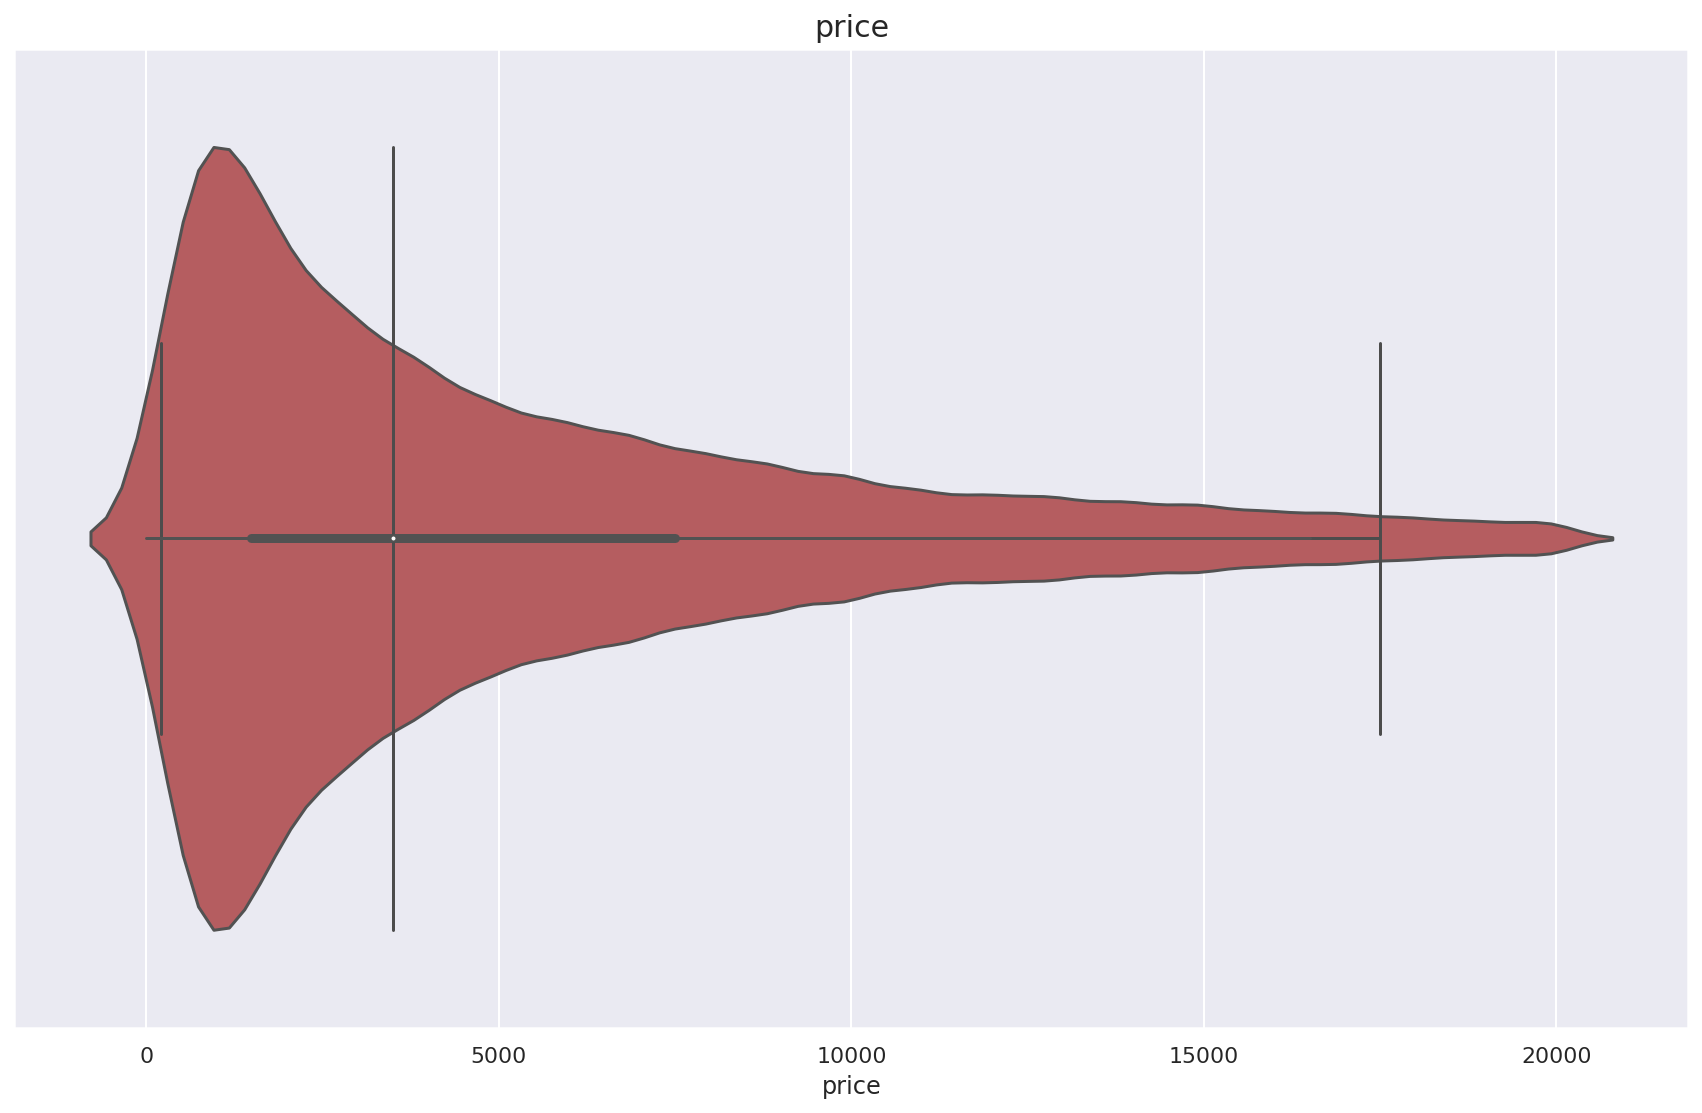

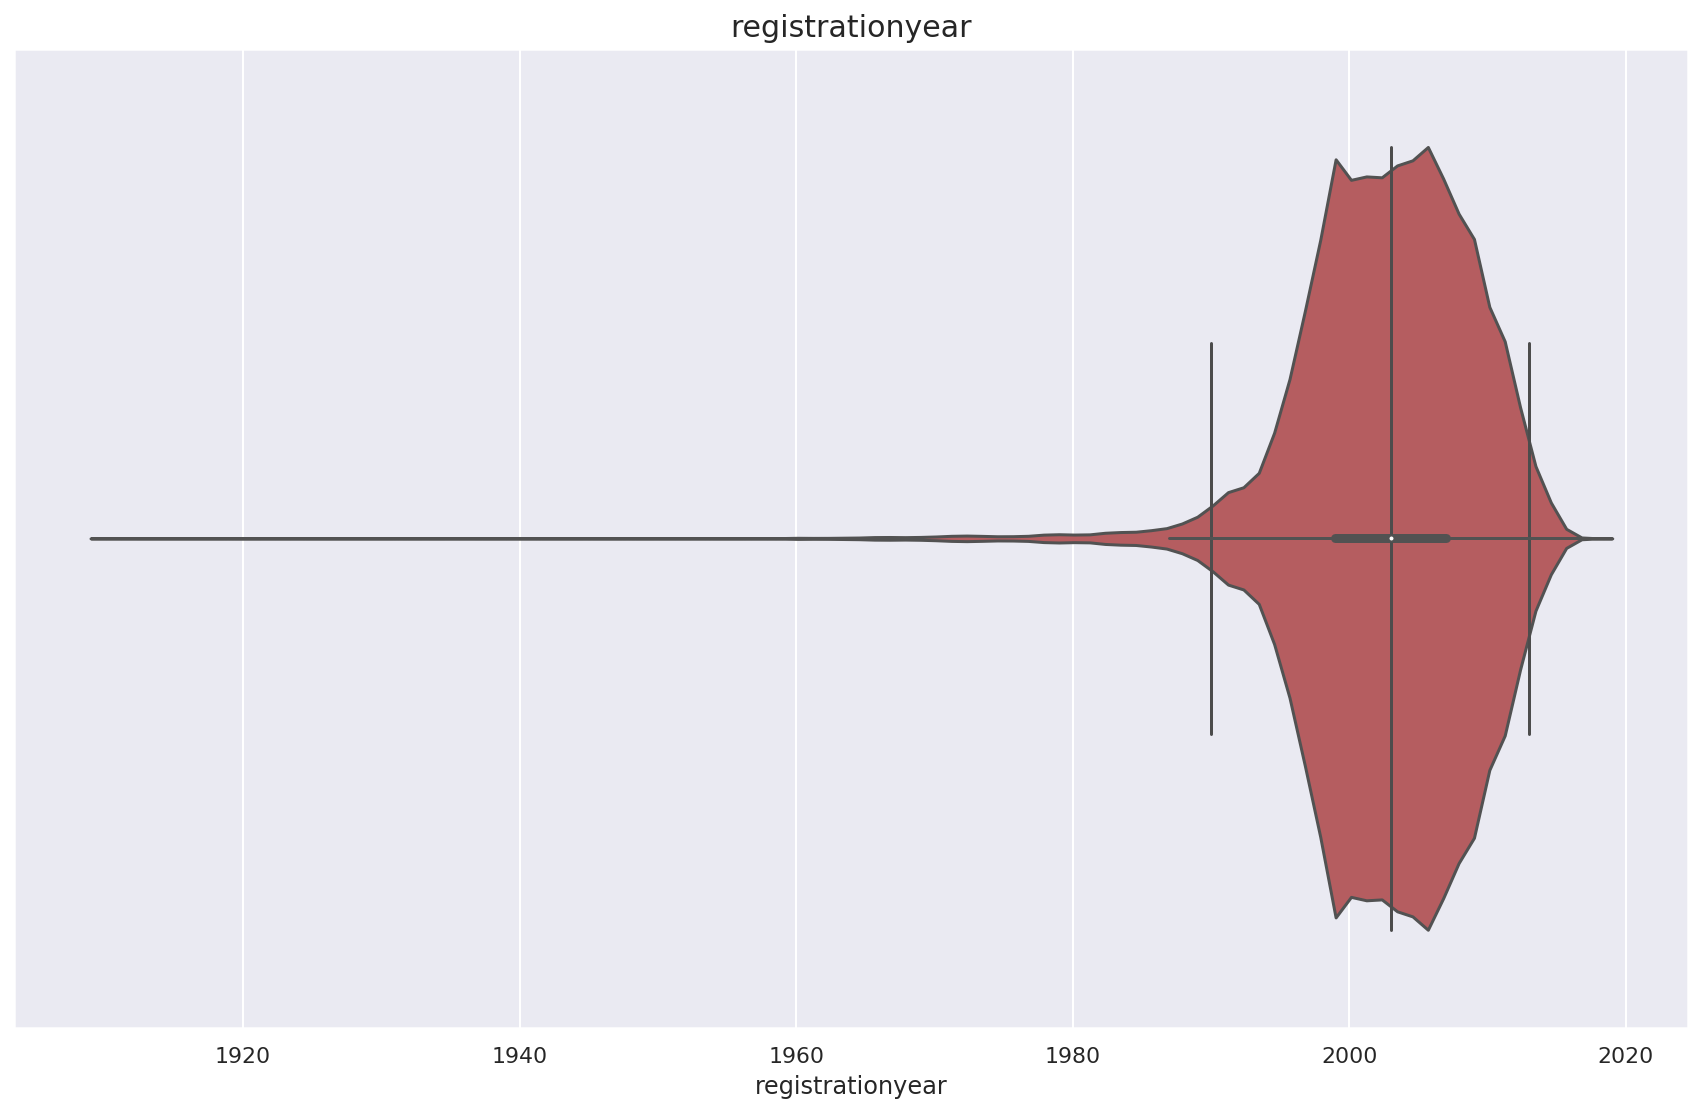

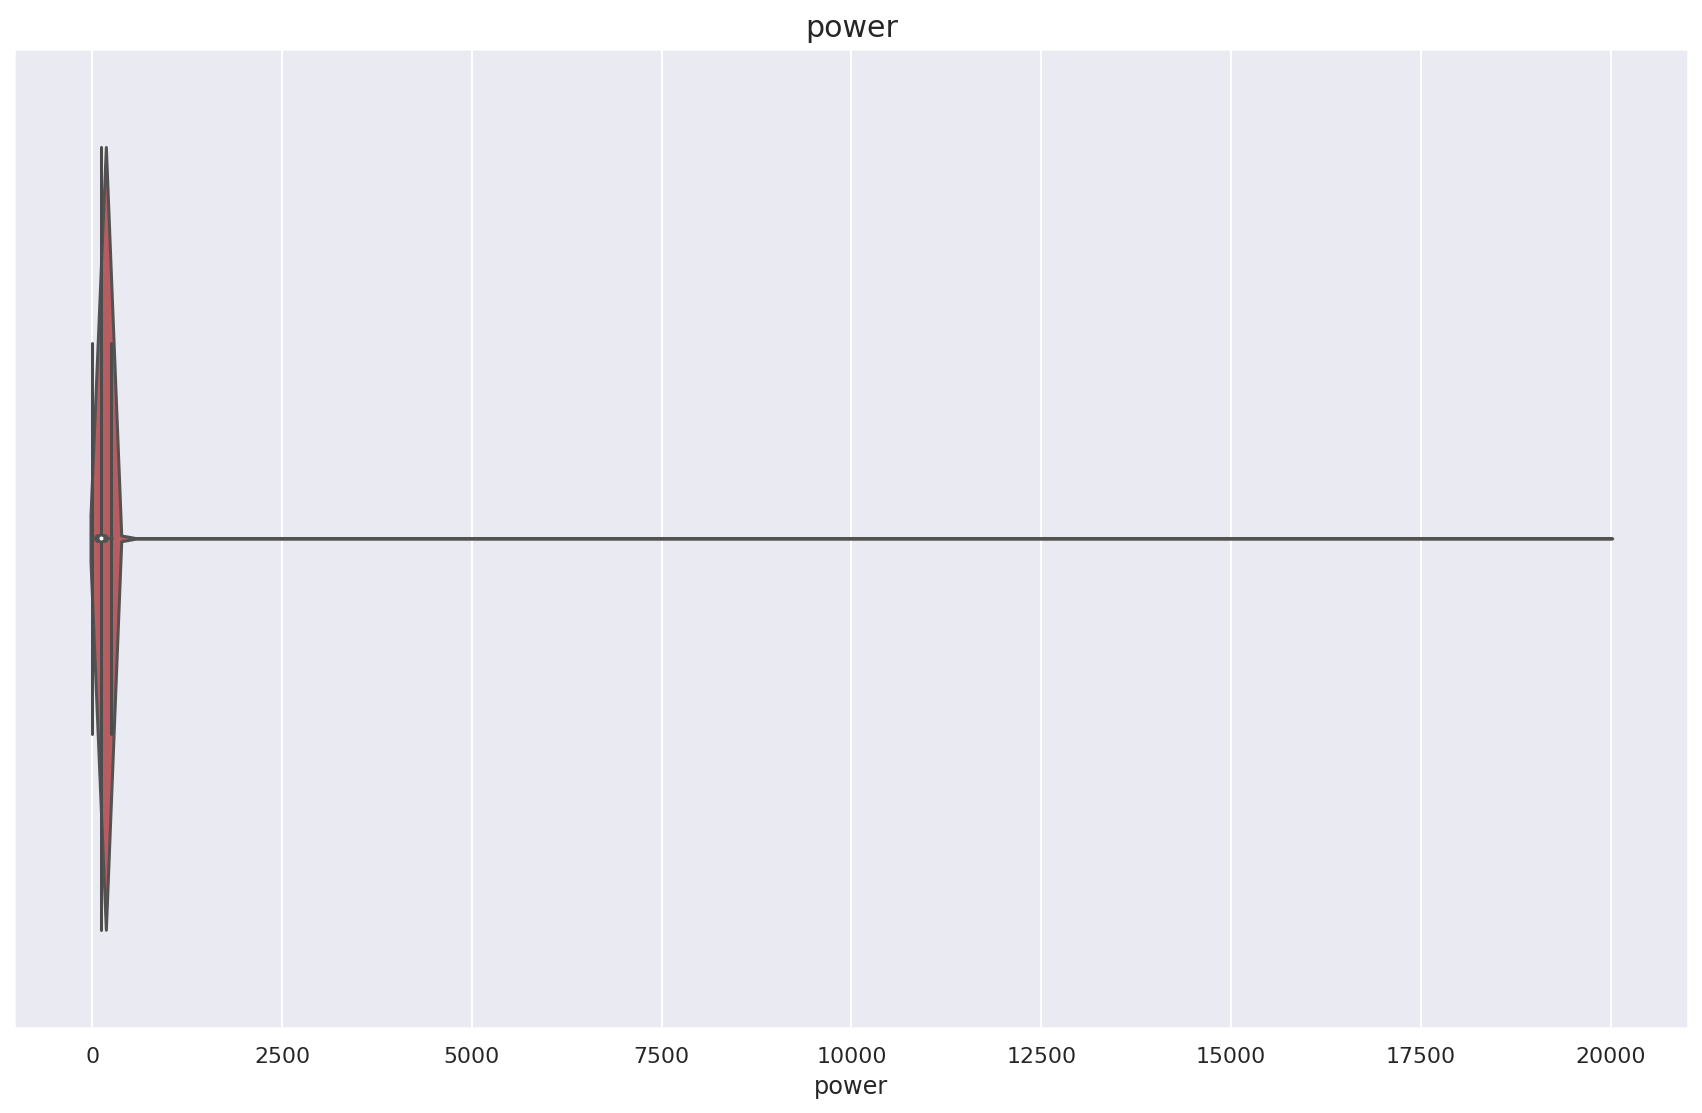

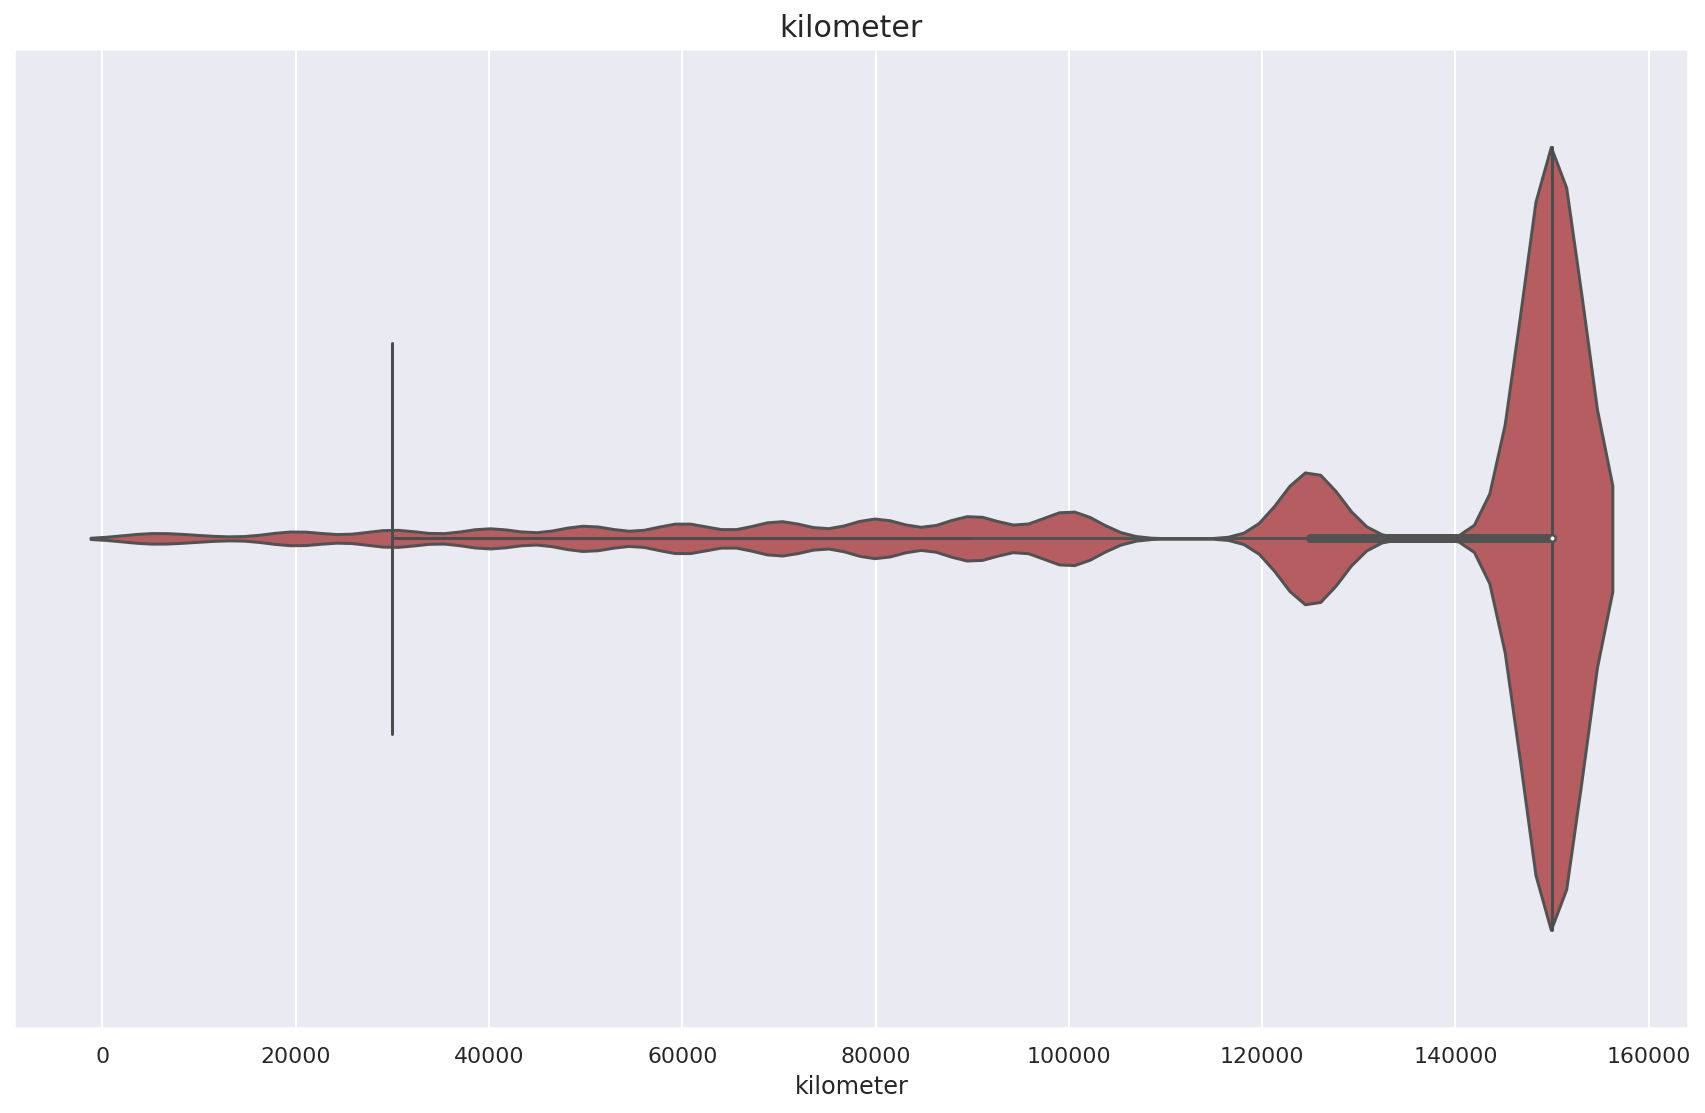

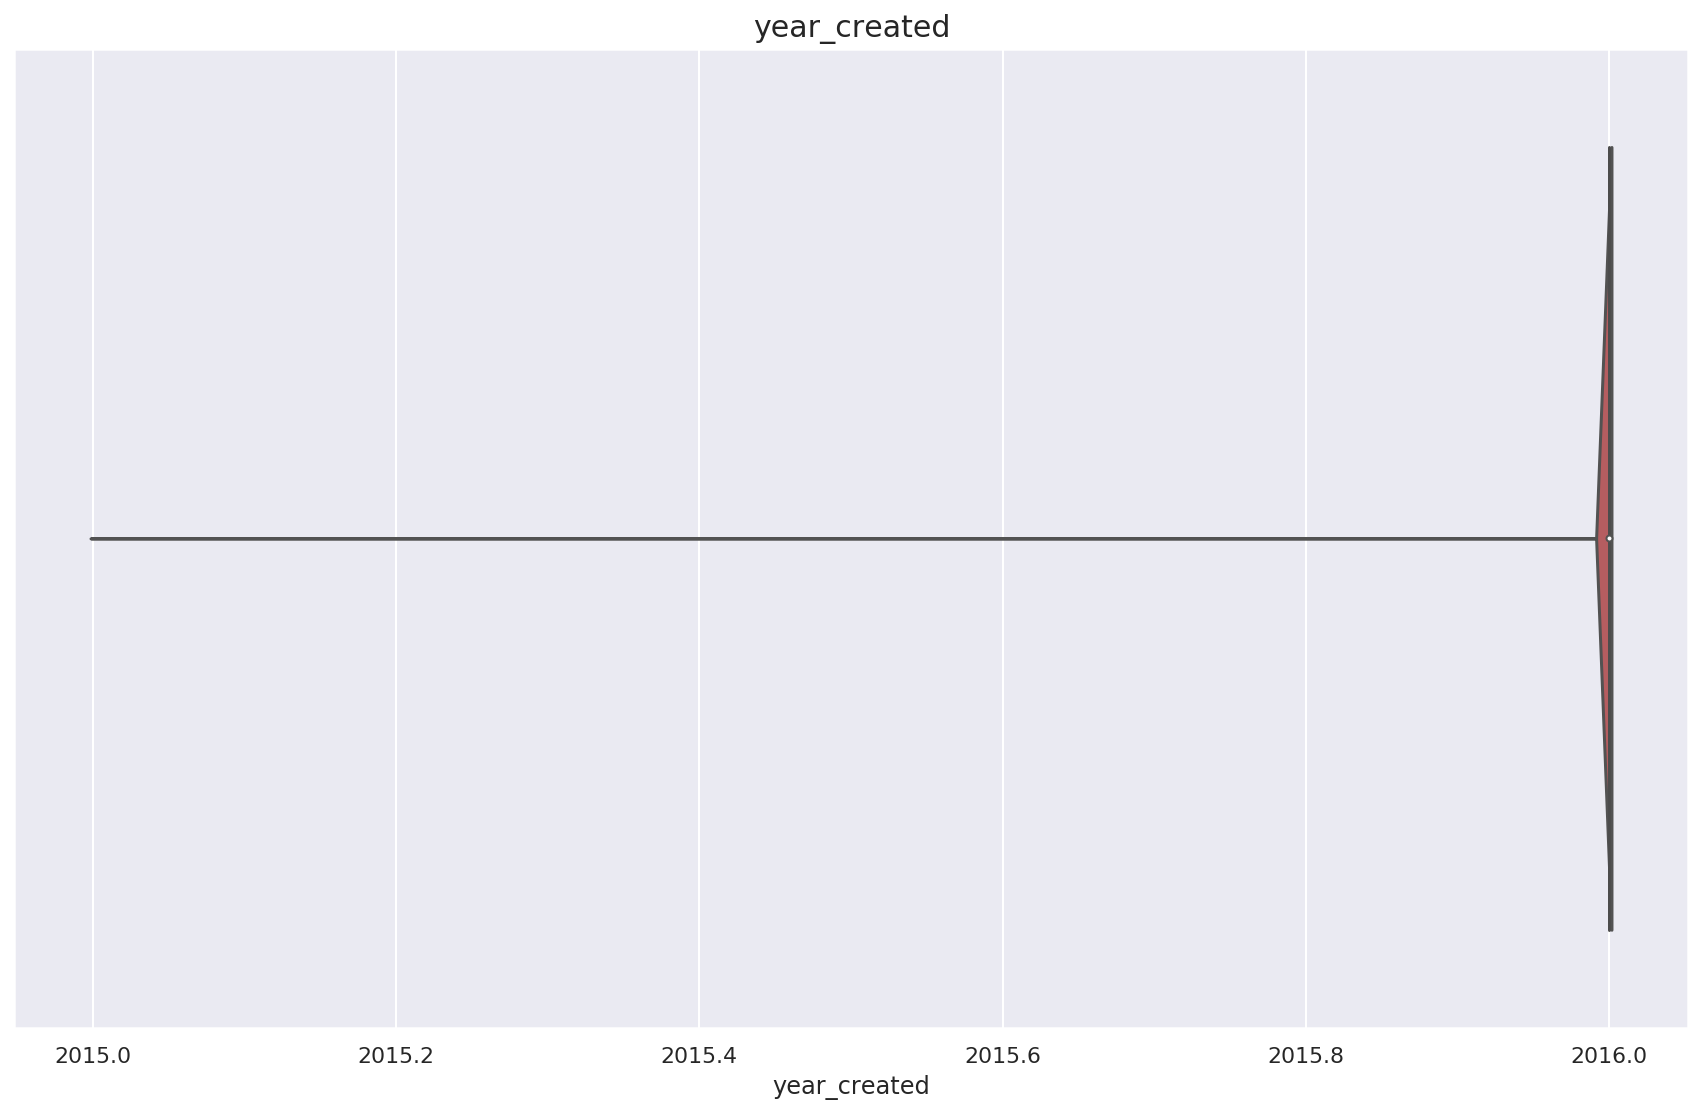

In [77]:
violinplots(columns_for_violinplot)

In [78]:
# Выкинем столбец с годом размещения объявления, т.к. там оказалось только одно значение...
df_encoded.drop('year_created', axis=1, inplace=True)
columns_for_violinplot.remove('year_created')

In [79]:
# Распределение целевого признака, а так же пробега не вызывает вопросов, их трогать мы не будем
# В то время как мощность двигателя и год регистрации содержат явные выбросы
# Откинем все значения < 2.5% и > 97.5% квантилей
df_encoded = df_encoded.loc[(df_encoded.registrationyear < df_encoded.registrationyear.quantile(.975)) & 
               (df_encoded.registrationyear > df_encoded.registrationyear.quantile(.025)) &
                           (df_encoded.power < df_encoded.power.quantile(.975)) & 
               (df_encoded.power > df_encoded.power.quantile(.025))]

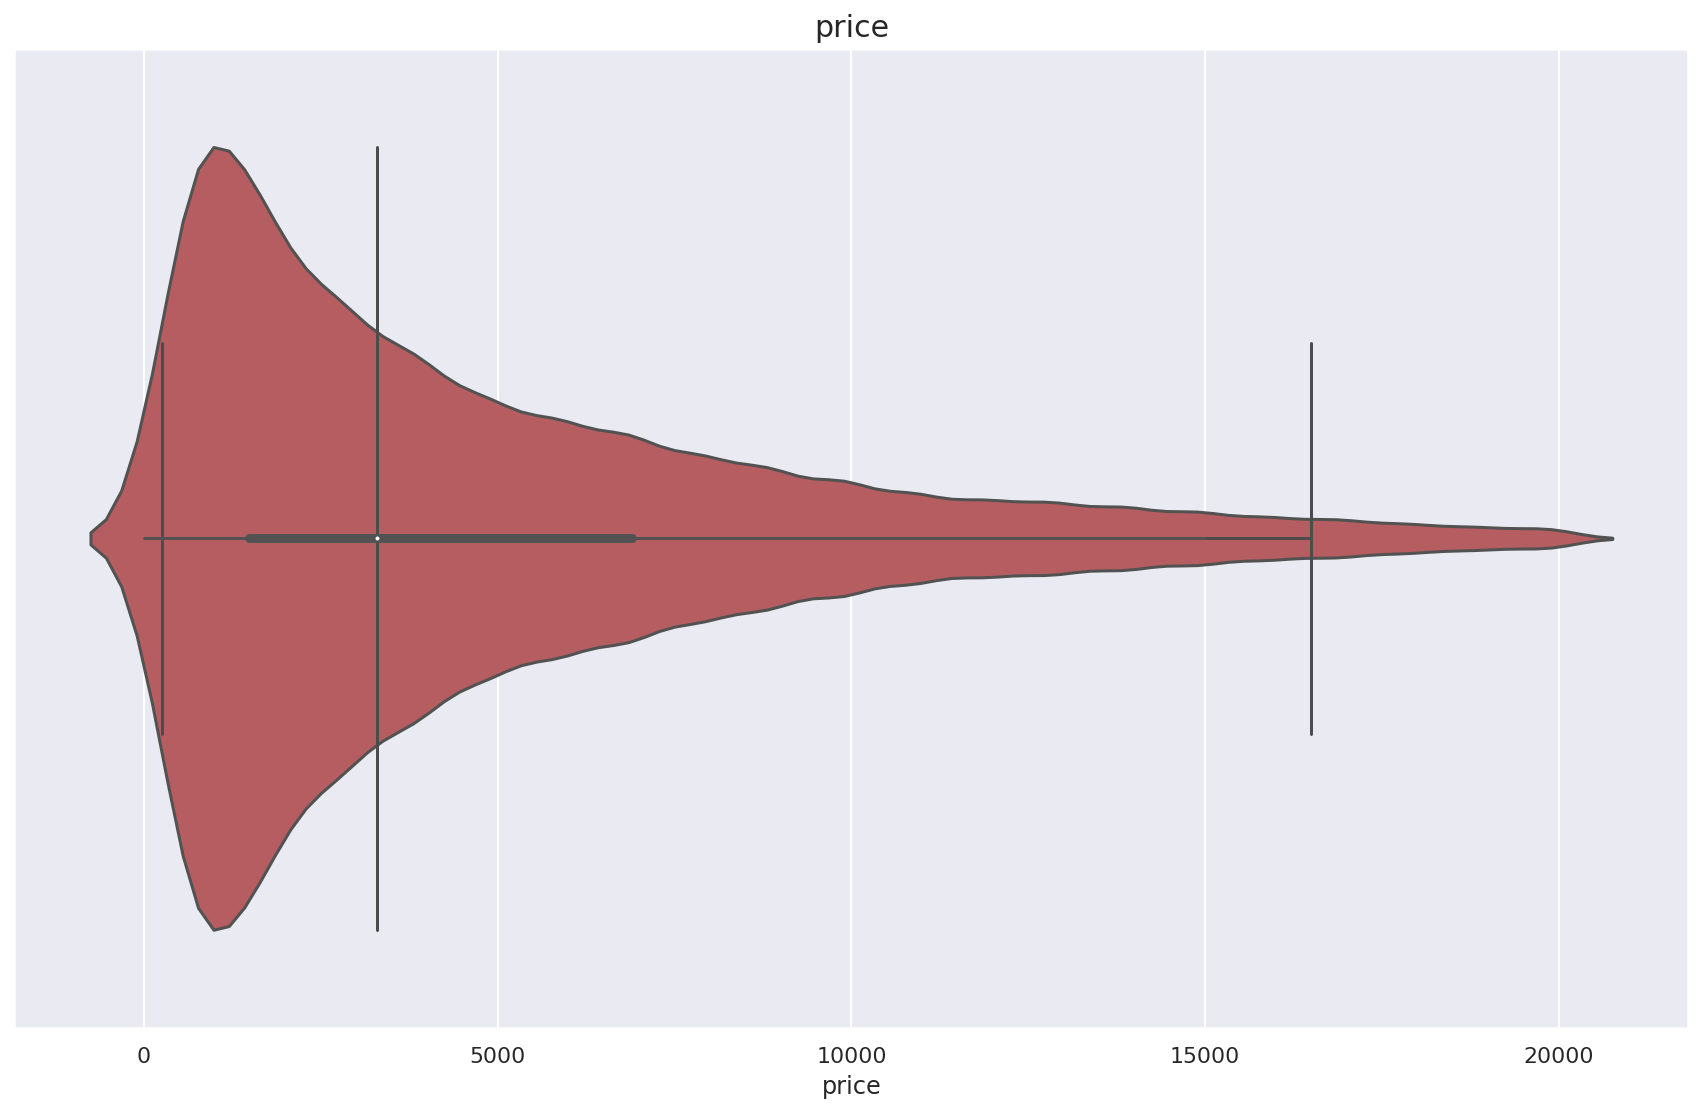

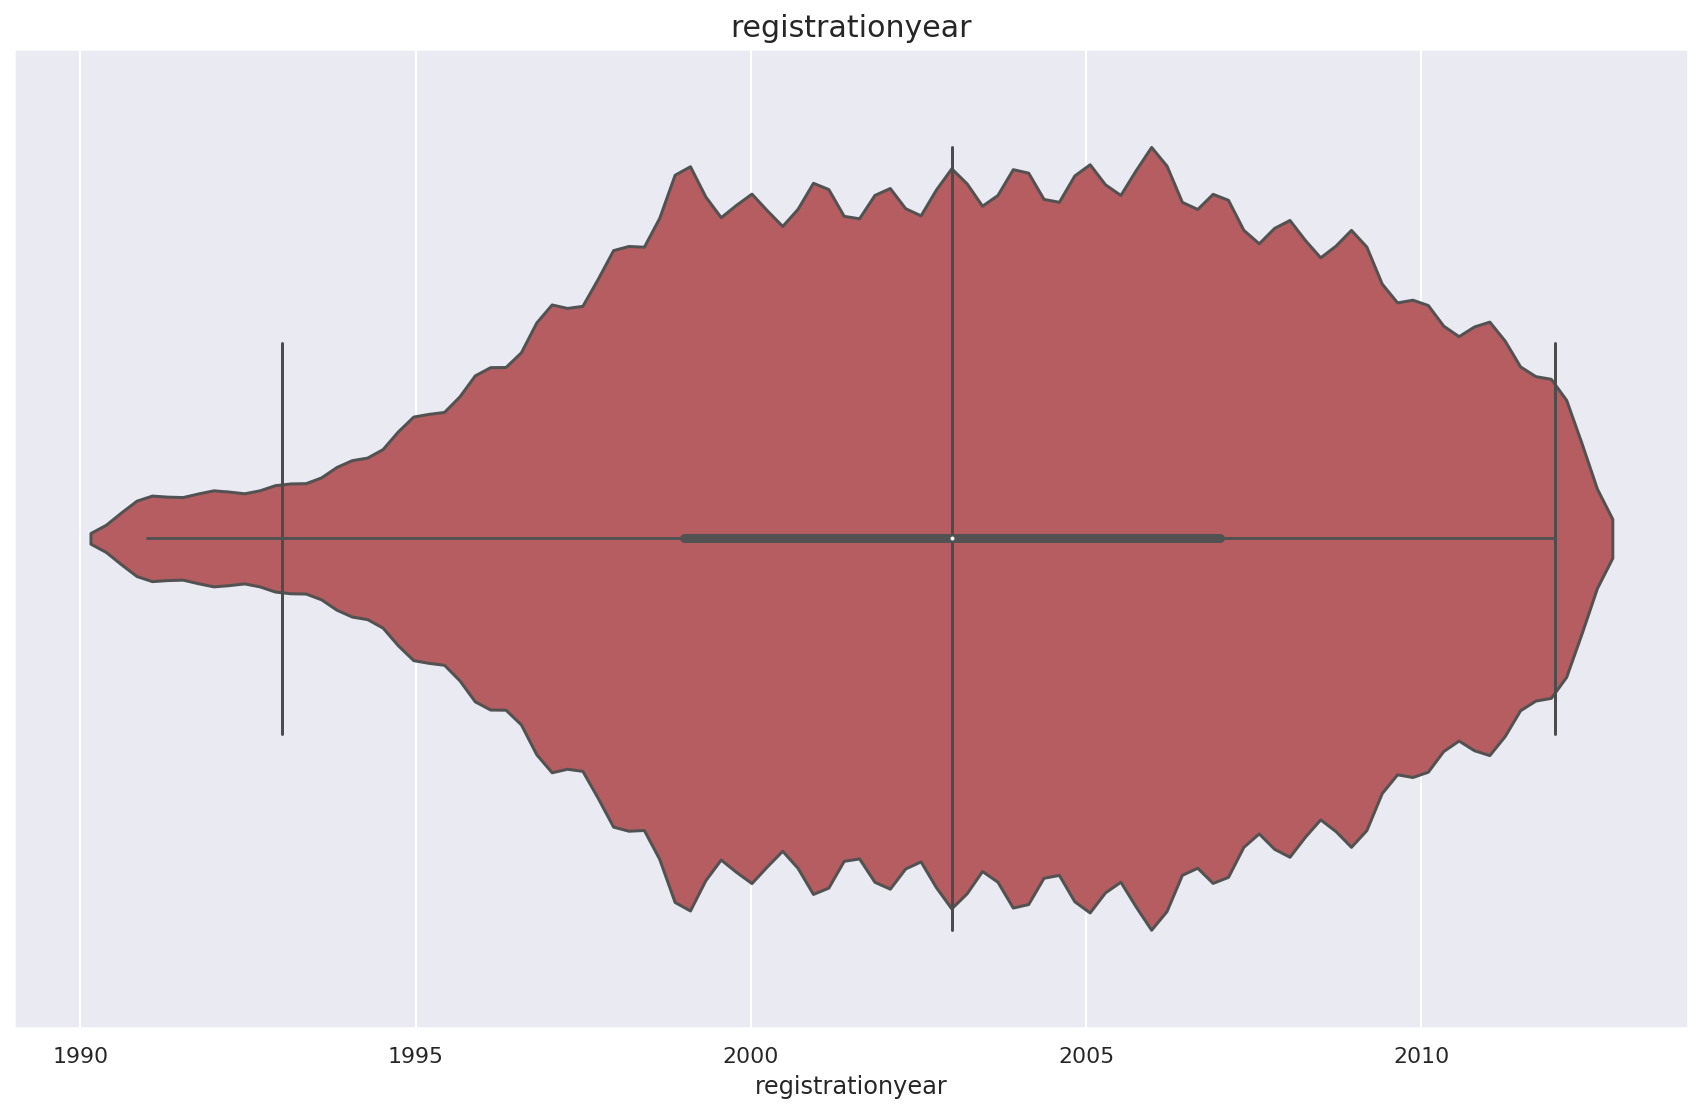

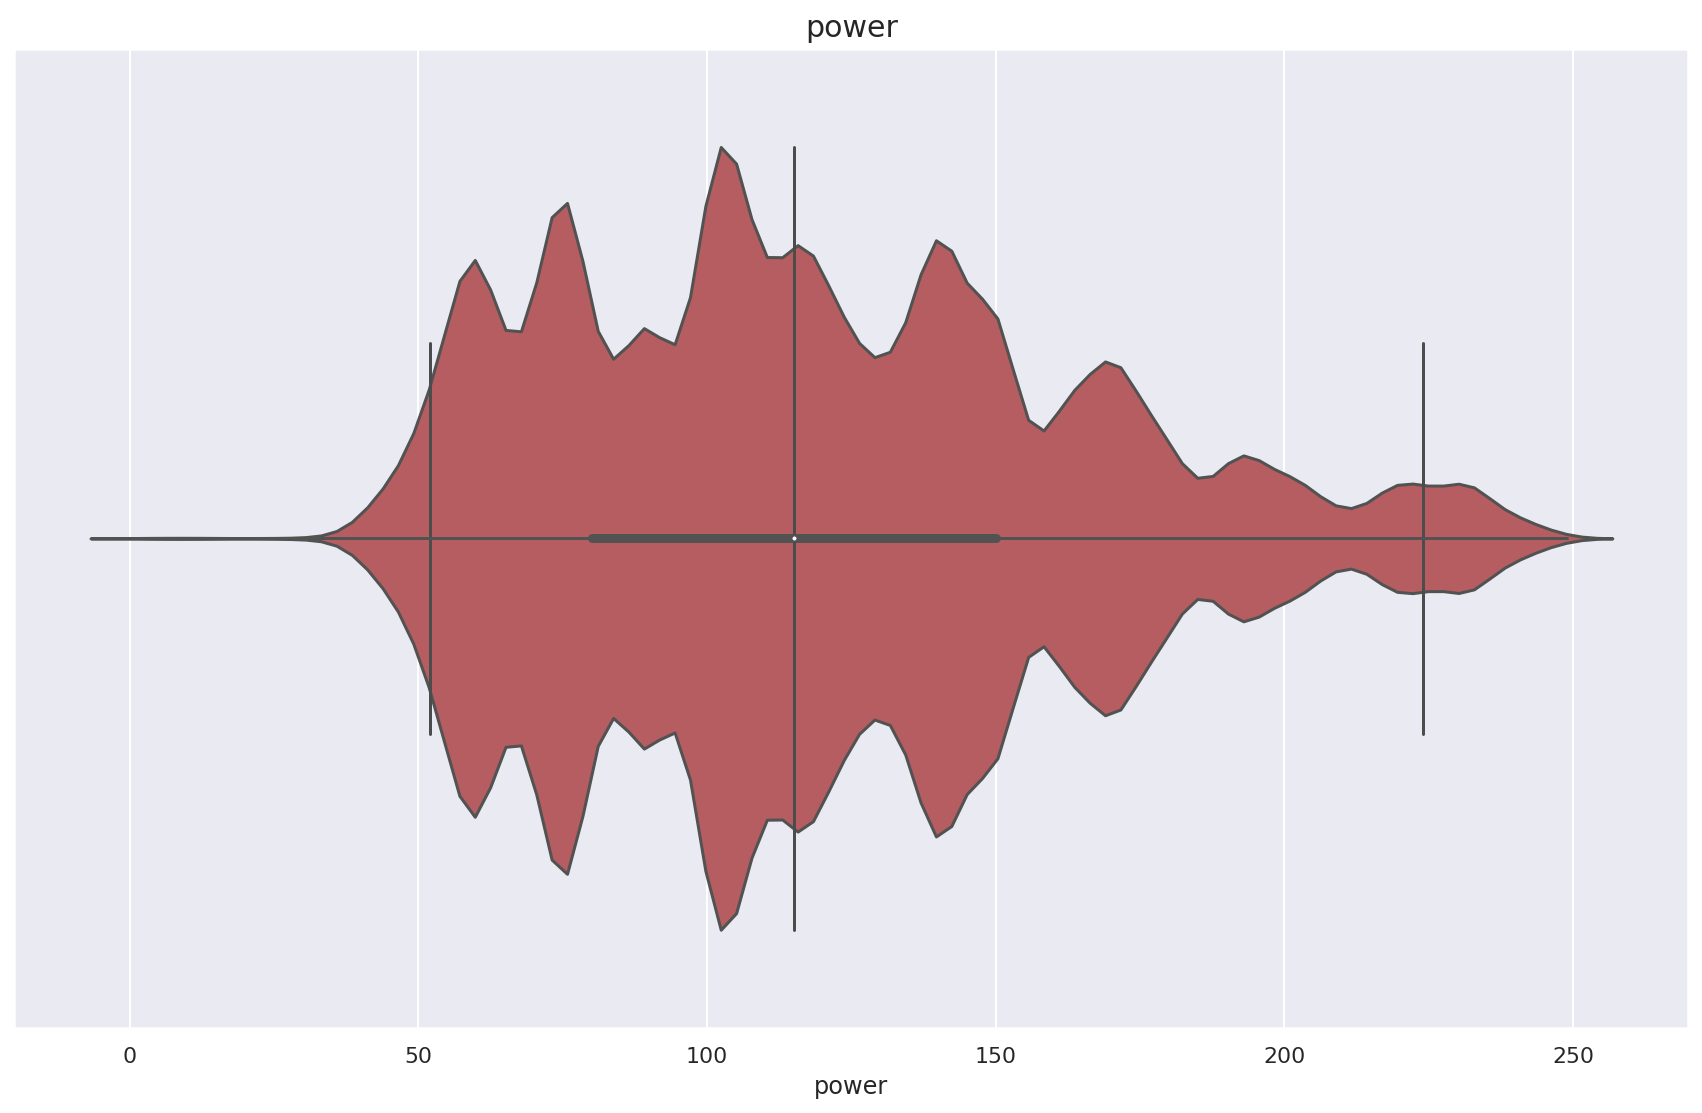

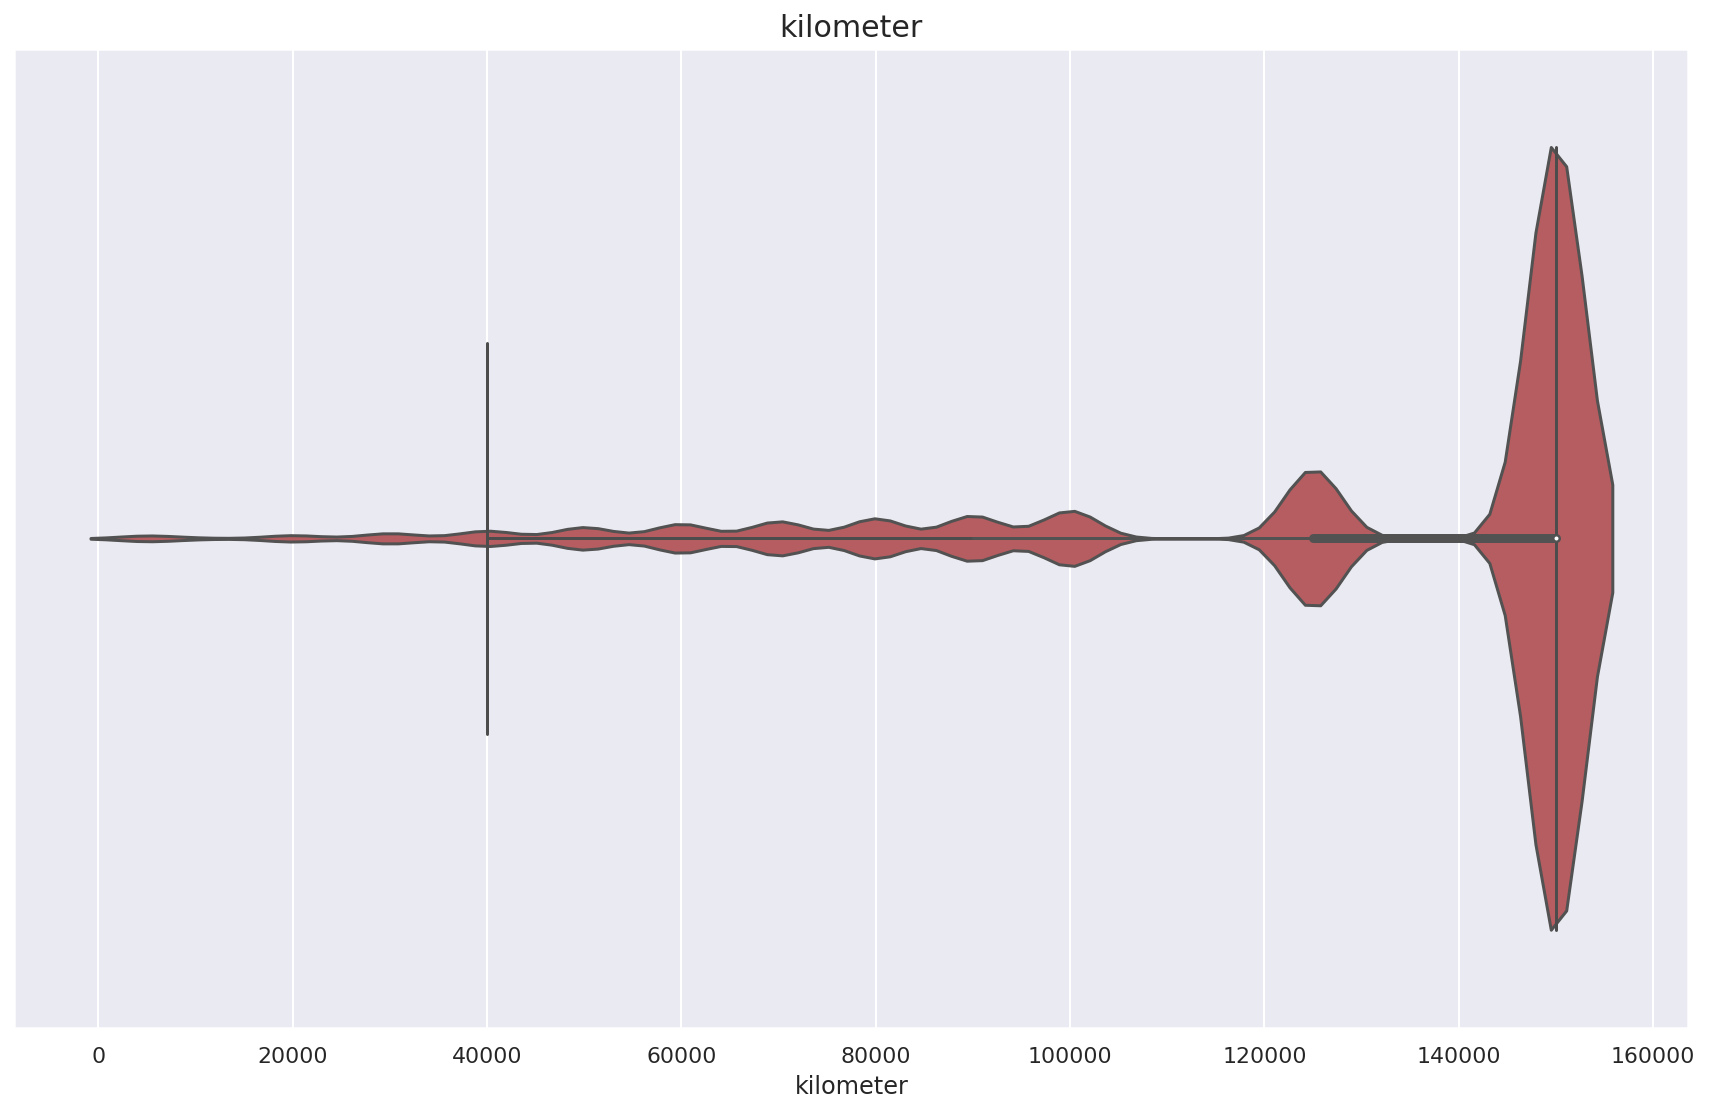

In [80]:
# Еще раз посмотрим на распределение наших признаков
violinplots(columns_for_violinplot)

In [81]:
del columns_for_violinplot

<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что была сделана визуализация.
</div>

**Масштабирование**

In [82]:
# Напишем функцию, которая поделит наши датасеты на обучающие и валидационные выборки
def split_data(df):
    features = df.drop(['price'], axis=1)
    target = df['price']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=STATE)
    print(features_train.shape)
    print(features_valid.shape)
    scaler = MinMaxScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features, target, features_train, target_train, features_valid, target_valid


features, target, features_train, target_train, features_valid, target_valid = split_data(df_encoded)

(157114, 25)
(52372, 25)


**Комментарий ревьюеру:** Так же в голове все еще не уложилась история с масштабированием... К каким признакам нам его стоит применять и какой scaler использовать...? Возможно есть какой-то алгоритм работы с масштабированием или универсальные способы которые подходят к большей части табличных данных. Масштабируем ли мы ВСЕ признаки или же лишь те которые сильно по значениям отличаются, но тогда на сколько сильно они должны отличаться? И опять же какой Scaler использовать ведь они все по-разному работают...

<div class="alert alert-block alert-success">
<b>Успех:</b> Я обычно использую StandardScaler и применяю ко всем колонкам, это делает модель стабильнее. В целом, "деревянные" модели безразличны к нормализации данных.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> На всякий случай уточню, что такое "деревянные" модели? А то может я не так понял)
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Модели основанные на деревьях: решающее дерево, случайный лес, градиентный бустинг над решающими деревьями (catboost, lightgbm, xgboost, ...).
</div>

**Вывод**

- Избавились от записей с пропущенными значениями.
- Так же удалили все полные дубликаты.
- Закодировали по принципу One-Hot столбцы, в которых менее 20 уникальных значений.
- Закодировали марки и модели автомобилей числами с помощью OrdinalEncoder.
- Посмотрели на распределение признаков.
- Избавились от выбросов в числовых признаках.
- Промасштобировали данные.

## Обучение моделей

**Линейная регрессия**

In [83]:
# Обьявим новый датафрейм куда будем записывать показатели моделей
result = pd.DataFrame(columns=['Алгоритм',
                               'RMSE',
                               'Скорость обучения, сек',
                               'Время предсказания, сек',
                               'Выборка'])

In [84]:
start_learn = time.time()
model = LinearRegression()
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели линейной регрессии: {}'.format(end_learn))

Время обучения модели линейной регрессии: 0.31


In [85]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('Линейная регрессия', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE линейной регрессии на валидационной выборке - ', rmse)
print('Время предсказания линейной регрессии: {}'.format(end_predict))

RMSE линейной регрессии на валидационной выборке -  2453
Время предсказания линейной регрессии: 0.01


**LGBMRegressor**

In [86]:
# Версия яндекса не поддерживает 'neg_root_mean_squared_error' поэтому сделаем свой скоррер
def metric(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
mscorer = make_scorer(metric, greater_is_better=False)

In [87]:
%%time
estimator = LGBMRegressor()
params_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40],
    'max_depth': [5, 10, 20]
}

gbm = GridSearchCV(estimator, params_grid, scoring=mscorer, cv=3)
gbm.fit(features_train, target_train)
params = gbm.best_params_
print('Лучшие параметры для модели LGBMRegressor:', gbm.best_params_)

Лучшие параметры для модели LGBMRegressor: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 40}
CPU times: user 5min 17s, sys: 1.99 s, total: 5min 19s
Wall time: 5min 21s


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> В параметр scoring при определении GridSearchCV нужно передать нашу целевую метрику, то есть rmse. <a href="https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter">Здесь есть список уже реализованных функций</a>.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> К сожалению та версия что чтоит у яндексе не поддерживает 'neg_root_mean_squared_error', поэтому воспользовался make_scorer и передал его в параметр scoring при определении GridSearchCV. А так же добавил гиперпараметр categorical_feature=categorical
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Скорер определен верно. Да, в это версии библиотеки пока нет этой метрики.
</div>

In [88]:
model = LGBMRegressor(learning_rate = params['learning_rate'],
                          n_estimators = params['n_estimators'],
                          max_depth = params['max_depth'])

final_score = np.mean(cross_val_score(model, features, target, cv = 3))
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.8310510955077427


In [89]:
start_learn = time.time()
model = LGBMRegressor(learning_rate = params['learning_rate'],
                          n_estimators = params['n_estimators'],
                          max_depth = params['max_depth'])
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели LGBMRegressor: {}'.format(end_learn))

Время обучения модели LGBMRegressor: 4.9


In [90]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('LGBMRegressor', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE LGBMRegressor на валидационной выборке - ', rmse)
print('Время предсказания LGBMRegressor - {}'.format(end_predict))

RMSE LGBMRegressor на валидационной выборке -  1807
Время предсказания LGBMRegressor - 0.29


**Catboost**

In [91]:
#%%time
#estimator = CatBoostRegressor()
#params_grid = {
#    'learning_rate': [0.01, 0.1, 1],
#    'iterations': [1, 100],
#    'depth': [5, 10, 16],
#    'reg_lambda': [1, 5]
#}
#
#gbm = GridSearchCV(estimator, params_grid, cv=3)
#gbm.fit(features_train, target_train)
#params = gbm.best_params_
#print('Лучшие параметры для модели CatBoostRegressor:', gbm.best_params_)

In [92]:
params = {
 'depth': 16,
 'iterations': 100,
 'learning_rate': 0.1,
 'reg_lambda': 5.0
 }

In [93]:
#model = CatBoostRegressor(learning_rate = params['learning_rate'],
#                          depth = params['depth'],
#                          iterations = params['iterations'],
#                          reg_lambda = params['reg_lambda'],
#                          verbose=10)
#
#final_score = np.mean(cross_val_score(model, features, target, cv = 3))
#print('Средняя оценка качества модели:', final_score)

In [94]:
start_learn = time.time()
model = CatBoostRegressor(learning_rate = params['learning_rate'],
                          depth = params['depth'],
                          iterations = params['iterations'],
                          reg_lambda = params['reg_lambda'],
                          verbose=10)
model.fit(features_train, target_train)
end_learn = round(time.time() - start_learn, 2)

print('Время обучения модели CatBoostRegressor: {}'.format(end_learn))

0:	learn: 4054.1509786	total: 3.05s	remaining: 5m 2s
10:	learn: 2315.1960396	total: 19.6s	remaining: 2m 38s
20:	learn: 1904.0129556	total: 36.8s	remaining: 2m 18s
30:	learn: 1790.1328508	total: 54.6s	remaining: 2m 1s
40:	learn: 1741.6726062	total: 1m 12s	remaining: 1m 44s
50:	learn: 1713.3259174	total: 1m 30s	remaining: 1m 26s
60:	learn: 1685.9303383	total: 1m 47s	remaining: 1m 8s
70:	learn: 1661.2791857	total: 2m 4s	remaining: 51s
80:	learn: 1641.0003356	total: 2m 22s	remaining: 33.5s
90:	learn: 1622.8073331	total: 2m 38s	remaining: 15.7s
99:	learn: 1602.0676318	total: 2m 54s	remaining: 0us
Время обучения модели CatBoostRegressor: 176.97


In [95]:
start_predict = time.time()
predictions = model.predict(features_valid)
end_predict = round(time.time() - start_predict, 2)
rmse = int(mean_squared_error(predictions, target_valid)**0.5)

result.loc[len(result)] = ('CatBoostRegressor', rmse, end_learn, end_predict, 'валидационная') 
print('RMSE CatBoostRegressor на валидационной выборке - ', rmse)
print('Время предсказания CatBoostRegressor - {}'.format(end_predict))

RMSE CatBoostRegressor на валидационной выборке -  1754
Время предсказания CatBoostRegressor - 0.11


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> У моделей Catboost и lightGBM существуют внутренние механизмы обработки категориальных признаков. В данном случае нужно использовать их. Более подробную информацию можно найти в интернете.
    <br> Подскажу с lightGBM: достаточно изменить тип колонок с категориальными признаками на соответствующий: .astype('category').
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Я правильно понимаю, что я могу просто не париться тогда над кодировкой вообще и просто использовать встроенные в модели алгоритмы? Но опять же, у нас довольно небольшой датасет, и встроенные алгоритмы работы с категориальными данными могут попросту переобучить модель. 
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Там используются алгоритмы не основанные на машинном обучении, так что они не могут переобучиться. В целом – да, для моделей у которых есть внутренние методы кодировки лучше использовать именно их.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал несколько разных моделей и не забыл про подбор параметров.
</div>

**DummyRegressor**

In [96]:
dummy = DummyRegressor(strategy="median")
dummy.fit(features_train, target_train)
dummy_predict = dummy.predict(features_valid)
dummy_rmse = int(mean_squared_error(dummy_predict, target_valid)**0.5)
result.loc[len(result)] = ('DummyRegressor', dummy_rmse, '-', '-', 'валидационная')
print('RMSE DummyRegressor на валидационной выборке', dummy_rmse)

RMSE DummyRegressor на валидационной выборке 4621


## Анализ моделей

In [97]:
# Лишний раз убедимся, что в нашем проекте выиграла модель LightGBM
result

,Алгоритм,RMSE,"Скорость обучения, сек","Время предсказания, сек",Выборка
0,Линейная регрессия,2453,0.31,0.01,валидационная
1,LGBMRegressor,1807,4.9,0.29,валидационная
2,CatBoostRegressor,1754,176.97,0.11,валидационная
3,DummyRegressor,4621,-,-,валидационная


<div class="alert alert-block alert-success">
<b>Успех:</b> Собрать все рузльтаты в одной таблице – отличная идея!
</div>

## Вывод

- Мы изучили данные из базы объявлений о продаже автомобилей и определили набор действий, которые выполним на этапе предобработки данных.
- Выполнили предобработку данных, по возможности заполняя пропуски в данных и удаляя сомнительные строки, которые могут породить ошибки при обучении.
- Закодировали категориальные признаки при помощи методов One-Hot, Ordinal Encoder, разделили данные на выборки для обучения и тестирования, затем количественные признаки отмасштабировали с помощью MinMaxScaler.
- Обучили модели градиентного бустинга LightGBM и CatBoost при помощи случайной оптимизации гиперпараметров.
- Сделали вывод, что лучшей моделью для решения нашей задачи будет LightGBM, потому что она обеспечивает хорошее качество предсказаний при меньшем времени обучения.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей